# Tutorial - Extracting Text and Analysing Sentiment from Digitized Documents in the UCSD Library's Digital Archive

## Part 1 - Text Extraction and Sentiment Analysis

## Description

This tutorial demonstrates how to use Google Cloud Platform's Natural Language Processing API to extract text from UCSF's "No More Silence" digital archive. This digital archive contains scanned and digitized records documenting the AIDS crisis from the early 1980s to 2007. Because this archive contains a wide range of data, the accuracy and completeness of text extraction varies dramatically between documents. In this archive, text is contained in images, posters, health records, legal and government documents, community service and vounteer group forms, handwritten letters, and handwritten notes jotted into the margines of official documents. 

### Part 1 - Analyzing a Single Document

Part 1 of tutorial demonstrates how to use the Google Cloud NLP Services to extract text and determine the sentiment of a single document from this collection.

The document used in this tutorial contains four significant and different text styles available in the archive. These include

1. A page combining well formatted, clear and consistently aligned typing and handwritten notes in the margins.

2. A typed page with inconsistent horizontal formatting

3. A handwritten page of printed, easy to text

4. A handwritten page of cursive, difficult to read text



## Objective

The primary objectives of this tutorial are to 

1. Provide workshop participants with an overview Google Cloud Platform's Natural Language Processing for analyzing digitized library material. 

2. Expand opportunities to analyze the No More Silence Dataset to a wider audience. 

3. Demonstrate, through example, how bias can be introduced into a data set when translation accuracy and completeness from NLP methods varies baased on document type.

### A Note About This Collection

"No More Silence" is a project to compile previously difficult-to-access unstructured textual data into a publically-available data resource for digital medical humanities, health sciences, and community history researchers to enable better computational access to the evidence of the lived experiences of people with AIDS and the cultural response to the epidemic [1].

This collection, overall, is composed of 717 scanned multi-page documents and takes up 40GB. For access (including download link) to the entire digitized dataset, please see the dryad page at:

[1] https://datadryad.org/stash/dataset/doi:10.7272/Q6HD7SV7



### File for this Tutorial

For Part 1 of this Tutorial, we will focus on extracting text and analyzing sentiment for a single document, glbths_2005-13_001_001.pdf. This document is avaible for download in the data folder of this repository.

This document contains several of the different text types you'll find in the general collection - typing, handwriting, printing, cursive. This will give you an opportunity to investigate the accuracy and completion of the Google Natural Language processing API on different types of text. As you'll see in later sections, some types of writing or printing are extracted with at a much higher accuracy level than others. 

Although the document we'll use for this tutorial does represent a fairly wide range of input types, I encourage you to download and read through the documents in this collection, in order to develop a greater general familiarity wtih this archive. A digitized document in this collection may still have many attributes that we haven't considered. 

Are we considering background images? The color of the ink used? Was the text written on a notepad, legal rule paper, or graph paper? Does the handwriting indicate that the writer was working in an office, with up to date equiment, or in an underfunded community service office with old typewriters running out of ink, or with paper and pencil in a hospital or jail, jotted down quickly, under conditions of duress?

Although this is intended to a technically focused tutorial, I hope the code sampes here also make it clear how important it is to read and become familiar with the original documents you're analyzing digitally and through code, in this collection and others. This kind of familiarity may include visiting the archives and working with the actual, physical collection, as there may be aspects to a document that aren't preserved when it is scanned (for example, the brittleness or thickness of the paper). 

### Data Files for this Tutorial

Because the full dataset archive is large (>40GB zipped), the single file used for analysis, glbths_2005-13_001_001.pdf, is available in this repository. 

However, please cite the DOI in the Dryad Link when using this dataset (including glbths_2005-13_001_001.pdf) in your resaarch.

https://datadryad.org/stash/dataset/doi:10.7272/Q6HD7SV7

### Contents

In this tutorial, we'll take a single pdf file from the No More Silence Collection, extract the text from it, and determine sentiment using the Google Cloud Natural Language Processing API with a Colab notebook. To do this, we'll go through the following steps

1. Upload a pdf file to your google drive account

2. Mount your google drive directory to access the pdf file through a colab notebook

3. Convert the pdf file to a series of images, one for each page. From this, we will pick 4 pages, each that represents a different style of document, including: typed and well formatted, typed and horizontally uneven, handwritten clearly printed, handwritten with obscure cursive. 

For each of these pages (representing a different text type), we will:

4. Convert the image to a binary 64 bit string

5. Send the 64bit string representation of the image to the Google Cloud text extraction and translation web service

6. Extract the text and assess the accuracy and completeness of text extraaction

7. Estimate the sentiment (direction and strength) of each document using the NLP sentiment API



### glbths_2005-13_001_001.pdf

First, let's take an image, one with a mix of different types of text (typewriter, uneven typewriter, neatly printed, cursive).
glbths_2005-13_001_001.pdf is one good image. 
Before we do anything else, let's download it and take a look at its contents.

This particular pdf contains 35 pages. 

1. Page 1 is typed, but the horizontal alignment is not consistent. 
2. Page 12 is typed with consistent horizontal alignment, though there are handwritten notes in the margins. 
3. Page 17 is handwritten, in clearly printed letters. 
4. Page 35 is typed, with consistent horizontal alignment




### Getting the File into Colab

There are a number of different ways to get data into a colab workbook. For this tutorial, we'll upload the file directly to google docs and access it through the file system. 

In my google drive space, I created a folder called "No-More-Silence" (I avoid spaces in folder names, though they are allowed) and uploaded glbths_2005-13_001_001.pdf to it.

### Convert the PDF to Image files.

The google cloud API can extract text directly from a PDF, but I find it easier to work with image files, especially if I only want to analyze a subset of the pdf. In this case, we'll split the pdf into a series of image files, one for each page (35 in all).

First, we need to mount the filesystem. To do this, run the line of code below, and follow the instructions to enter an authorization code.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


You can now access the files in your google drive directory. For example, we can list the contents of the "No-More-Silence" directory (for now, there should only be one, unless you've loaded more files into it)

In [0]:
import os

In [0]:
for file_name in os.listdir("gdrive/My Drive//No-More-Silence/"):
  print(file_name)

glbths_2005-13_001_001.pdf
glbths_2005-13_001_001.csv
glbths_2005-13_001_001_categories.csv


Next, we'll convert the pdf to a series of image files, using the pdftoimage module, which in turn depends on the poppler-utils. 

https://pypi.org/project/pdf2image/

https://poppler.freedesktop.org

You'll need to install these if you don't have them yet.

In [0]:
!pip install pdf2image
!apt-get install poppler-utils 

  Created wheel for pdf2image: filename=pdf2image-1.12.1-cp36-none-any.whl size=9027 sha256=808819e989461f92a31861038a80c9d83c3146316991cf10ab7235a71431575c
  Stored in directory: /root/.cache/pip/wheels/0f/80/3a/fac1dc0f7dbe12c805b9dc6497f325f0e9f9cedbec3ab0185b
Successfully built pdf2image
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 1s (179 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.

In [0]:
from pdf2image import convert_from_path

OK, we're ready to convert the pdf to images! This will take a while...

In [0]:
images = (convert_from_path('gdrive/My Drive//No-More-Silence/glbths_2005-13_001_001.pdf', fmt='png'))

Let's take a look at what we have in our images variable

In [0]:
print(type(images))
print(len(images))

<class 'list'>
35


All 35 images in a list. Let's view pages:

1 (typed, but with uneven horizontal alignment)

12 (typed with even formatting)

17 (handwritten, but neatly printed)

35 (cursive, harder to read by untrained people)

As usual in python lists, they're indexed from zero, so we subtract 1 from the page number to get the index of the file in the list.




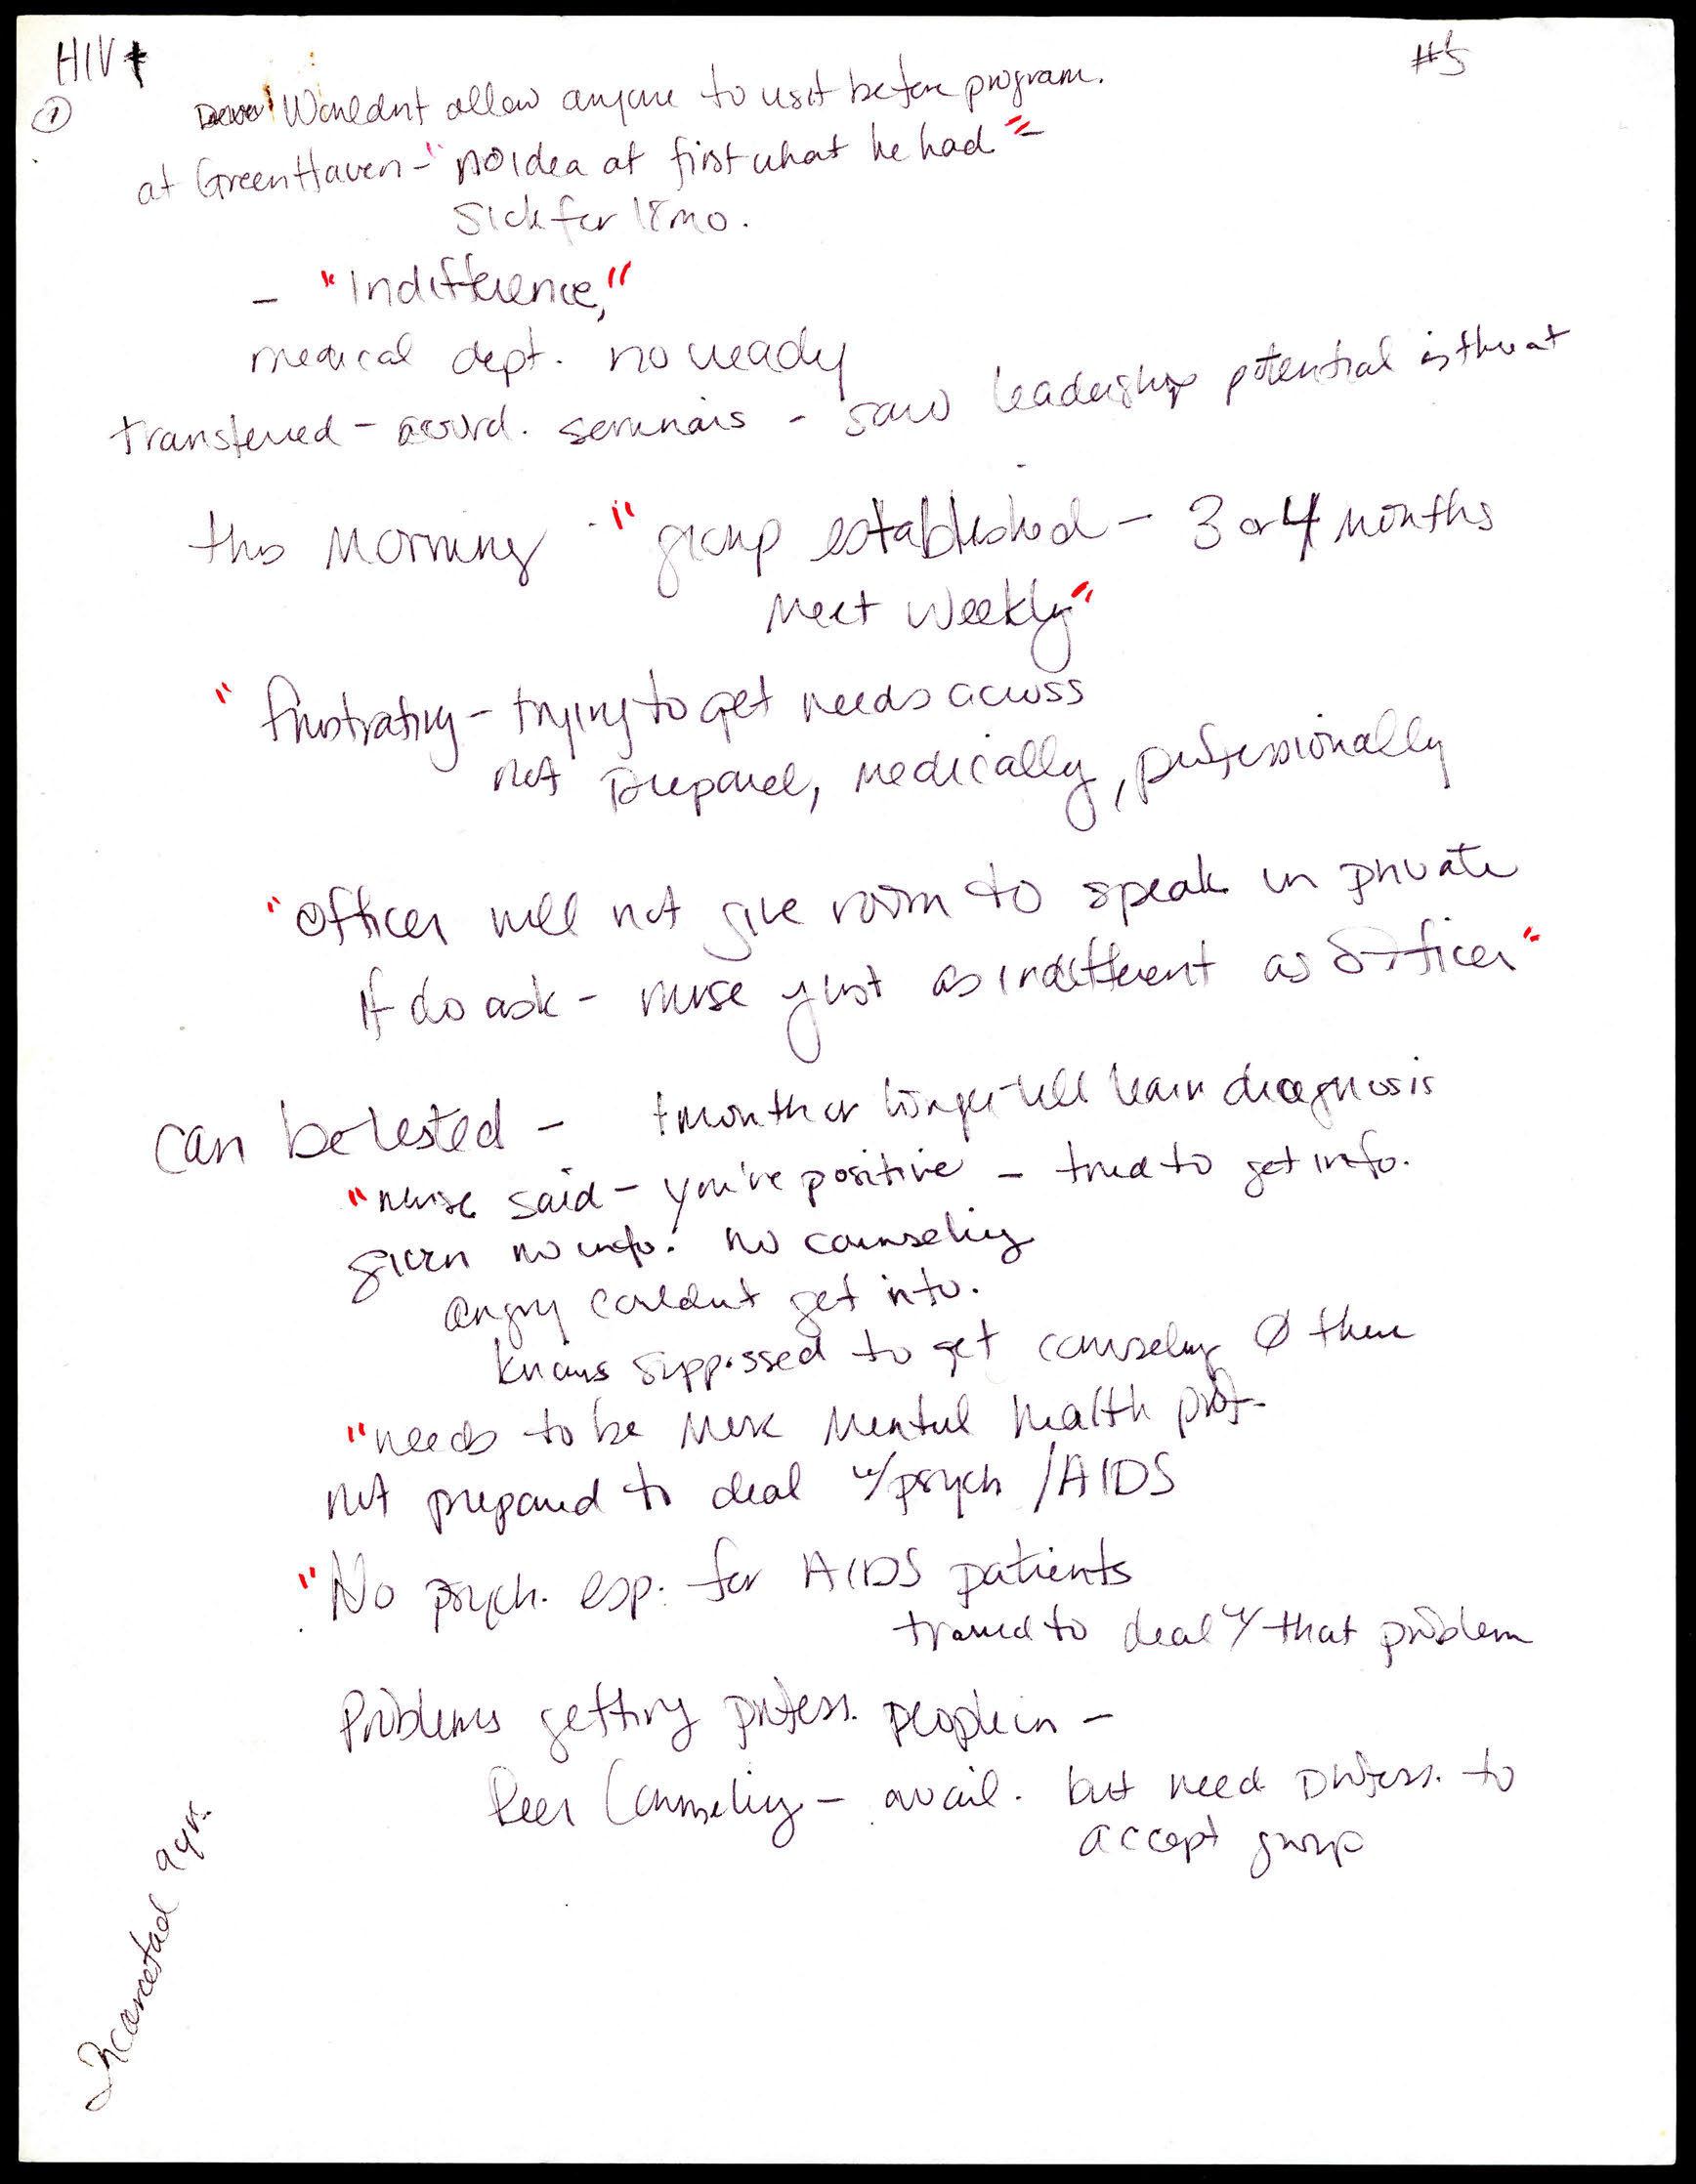

In [0]:
# 0, 11, 16, 34
images[34] 

### Extact Text using the Google Cloud API

Now that each page is available as an image file, let's see how much text we can extract from them using the Google Cloud Natural Language API.

Let's start with page 12, the well formatted and typed document, as this will pose the fewest problems for text extaction.

### Convert the Image to a Text Stream

To do this, we'll convert the image to a binary stream, and use the Google Cloud API to extract text from the binaray representation of the image.

NOTE: It is also possible to post the image to google cloud storage or the web and access it through a URL rather than converting it to binary. This is a simpler and more straightforward approach, but it does require creating a public link.

Import the base64 and io modules

In [0]:
import base64
from io import BytesIO

And now get a base64 representation of the image file.

In [0]:
buffered = BytesIO()
images[11].save(buffered, format="JPEG")
base64str = base64.b64encode(buffered.getvalue()).decode('ascii')

### Generate a Google Cloud API Key

Now we're ready to extract the text. To use the Google Cloud Natural Language Processing API, you'll need to generate a key. 

You'll run the code below, then go to the google cloud console:

https://console.cloud.google.com/

Create a new project, then under APIS & Services, select "Credentials". 

Click on "Create Credential", and then copy the API key and paste it into the form field that appears once you run the loine of code below.

In [0]:
import getpass
APIKEY = getpass.getpass()

··········


## Create a Service

In [0]:
from googleapiclient.discovery import build

In [0]:
service = build('translate', 'v2', developerKey=APIKEY)

### Extract the Text from the Image

We can now call the API to extract text from our image. Since we'll do this repeatedly, let's put it into a method

In [0]:
def extract_text(img):
  buffered = BytesIO()
  img.save(buffered, format="JPEG")
  base64str = base64.b64encode(buffered.getvalue()).decode('ascii')

  vservice = build('vision', 'v1', developerKey=APIKEY)
  request = vservice.images().annotate(body={
          'requests': [{
                  'image': {
                      'content':base64str
                  },
                  'features': [{
                      'type': 'TEXT_DETECTION',
                      'maxResults': 5,
                  }]
              }],
          })
  responses = request.execute(num_retries=5)
  return responses

And now that we have the method ready, let's extract text from the binary representation of our text file.

In [0]:
img_text = extract_text(images[0])

### Parse the Result (JSON)

The web service returns a JSON (dictionary) object holding information about the extracted text. It's worth looking through the fields and getting familiar with this response object. To get directly at the extracted text, you can access the following element of the tree:

In [0]:
print(img_text['responses'][0]['textAnnotations'][0]['description'])

July 24, 1990
De ar Sue,
Ihe Louisiana State Penitentiary consistes of 18, 000
acres of f arm land. Once ante bellum plantation land, its so to
say, home for 5,000 (or more) state prisoners, the bulk of
whom is confined to dormitories. he remaining few are confined
to Cellblocks, which falls in the category of one man Cells
or two man Cells. Currently, there aren't any designated area
here at Angola, where on ly HIV positive prisoners are confined
and/or restricted. And matter of fact, of the 94 HIV positive
prisoners here at Angola the majority of them are stationed
in dormitories, Which means that they are able to freely
congregate or intermingle with hundreds of non-HIV positive
prisoners every day, seven days a week. here are five prisoners
with AIDS 1iving at the prison hospital, and allegedly, there
a few prisoners with AIDS confined to Camp D, Hawk Cellblock
are
lockdown. Sometime in late 1987 or early 1988, two prisoners
(Herman Wallace and Harold Vincent) filed a civil suit af

A quick visual comparison of this translation to the original document, shows we are a substantial portion of the typed text, though with some loss. 

Let's try extracting text from the other documents - well formatted typing, printing, and cursive (11, 16, and 34)

First, the well typed document.

In [0]:
img_11_text = extract_text(images[11])
print(img_11_text['responses'][0]['textAnnotations'][0]['description'])

Note: For Dand Massey - uust use
He never save
AMeos per minion to use his
pseudonym.
July 27, 1990
name.
Sue Rochman
Advocate Newspaper
2145 mecklenburg road, #5
Ithaca,
NY
14850
Dear Ms. Rochman,
I am a recovering addict and a Person With AIDS (PWA's), I am also
a prisoner in the California Department of Corrections.
As a prisoner who's been incarcerated for almost
had definitely a positive diagnosis to the AIDS anti-body, I feel
I am qualified to relate my views about the AIDS situation inside of
the Del Norte Special Program Unit (SPU) here at the California Inst-
itution for Men
ment of Corrections' AIDS Units.
years now, having
East Facility.
It is one of the California Depart-
They have two.
This Facility, in concerning itself with the healthcare of inmates
with the HIV Virus and AIDS is the same as the old French prison
known as Devils Island!
It is segregation in California State Prisons, with the notion that
prisoners diagnosed HIV+ would benifit by living in one, segregated


The extraction aaccuracy of typed text here is nearly 100%. However, you may notice that the handwritten notes that were added the top of the document were not translated with anywhere near the same degree of accuracy as the typed text. 

The extraction is still useful, but if we do sentiment analysis, categorization, term frequence, or other NLP analysis on this document, it is important to be aware that what we're missing - handwritten text - may reflect a different perspective than what is in an official, typed document. Handwritten notes, for example, may express a very different sentiment than what is typed an official document!

Let's take a look at the handwritten, printed document (index 16)


In [0]:
img_16_text = extract_text(images[16])
print(img_16_text['responses'][0]['textAnnotations'][0]['description'])

DEAL SuE,
2 Aug 90
Hi, gOt youk
DEAD LINES CAŃ ALWAYS BE A BITCH, I 'LL GET RGHT
ON 1T.
LettEr toDAy, AND KNowiNg
I HoVE NO quAlms A Bout my REHL NAME
USED, HONESTLY I PRE FER IT PAT CALIFIA SAID I
mAy HEme Feom
HEAR FRom
EXPECT, HE DIDN'T tElL BE you WEKE t WRITER,
you,
So
I HAD NO IDEA WHtHT TO
But HHAT MAKE IT ALL tHE moRE NICER, I DON'T
RELIATE to FEMALES VERY LADELL, BEING GAy ALL
LIFE, I HAVE LITTLÉ EXPERIENCE WITH
HEM.
my
DOB Is: 29 Nou '47, BORN OF 7RIPLETS, I
AND my OTHER BROTHERS BeRN w itH mE wd ENT To 19
miLitArRy ACAZEMY IN CORAL GABLES, FLoRidm
ALL 12 yes Of GRADEE ş HigpH Setol CHeisTmAs,
EASTER, AND Summers I SANT AT my PARENTS
CLYDESDALE letnie t É DAIRY FARM IN NEW JERSEY
I'DISCOVERED I WAS GAry ABUUT agE 8, GaING
ta setteoL wiTH Gj000 Beys HELPED ME ALONS,
AND HAVING13 BROTHERS 5 SSZEKS 41 leme aN
H6LIDAYS, witH ABeut 300 ALL MAHE WORKERS ON
PARENTS 148,000 ACRE SPRENd HELPED ME ALONG to,
my
WENF to RuTGEKS IN 1963,4yes LATEI GRAD, WITH
A DEGREE II NURSING, ANd WENT 

We're certainly capturing some of the text from the original handwritten document, though the loss factor is much higher here. Again, if we were to do sentiment analysis on the entire document, we might be losing critical information, as many of the handwritten letters in this collection were written from prison. Sentiment, term frequency, and categorization could be very misleading, as well typed and formatted documents more typical of well funded institutions are translated with a far lower loss of information. 

Lastly, let's take the cursive document (index 34)

In [0]:
img_34_text = extract_text(images[34])
print(img_34_text['responses'][0]['textAnnotations'][0]['description'])

HIVe
Deaso d Wenednt allow to ust hcter proguam.
to ust betor poyram.
anjare
at GreentHaven-'noidea af fistuhat he had ?
Sich fer 1{mo.
- "Indiffeene,"
medical dept. no
wady
Fransteved - Berd. sermnais
saw leadeşly poteuhal isthuat
the Morning " picap establucho d - 3a4 months
gramp
warking
Meet
thuotratng - tayny to get needs ccuss
net Frepanel, medically pulgesinally
to speak in phuate
int as iractterent as Soficen"
*officer mel net
give
oom
t do ask - vuuse
tmon th er löagetell eain diaguosis
trua to get info.
Can belested
" Rurse said - ym've positive
gieen w ufo. nw
Any caldut et into.
En cius sipp.ssed to get caselur Ø thure
I'needo to be Mese Mentul health pot-
nuA prepand to deal w/peych IAIDS
conseliy
poych. esp:
fer AlDs patients
tramd fo deal y that pwolem
Pribdlems gething puiten plapie in -
teer Canmelig - awail. but need Dhjers. to
accopt gume
Acaretad qya



Unfortunately, it's difficult to get a sense of this document from the text extraction. NLP analysis of the full document is likely to entirely ignore the content of handwritten letters. 

## Sentiment Analysis and Categorization

Google Cloud NLP API provides services to do sentiment analysis and categoriation through pre-trained models on a text file. The process for calling the service is similar to what we did for text extraction.

In [0]:
lservice = build('language', 'v1', developerKey=APIKEY)

In [0]:
def read_sentiment(document_str):
  response = lservice.documents().analyzeSentiment(
    body={
      'document': {
        'type': 'PLAIN_TEXT',
        'content': document_str
    }
  }).execute()
 
  return response


As a bit of housekeeping, let's store the extracted text in a string for each document

In [0]:
img_0_text = img_text['responses'][0]['textAnnotations'][0]['description']
img_11_text = img_11_text['responses'][0]['textAnnotations'][0]['description']
img_16_text = img_16_text['responses'][0]['textAnnotations'][0]['description']
img_34_text = img_34_text['responses'][0]['textAnnotations'][0]['description']

And now we can call the API to do sentiment analysis on the image file. The API returns a dictionary containing (among other things), a sentiment score and a magnitude. 

Here are the sentiment scores and magnitudes for the documents we've analyzed so far. Unfortunately, the scores for the handwritten and, especially, cursive documents are unreliable due to how much data was lost.

In [0]:
# typed, with uneven alighment
img_0_sentiment = read_sentiment(img_0_text)
print(img_0_sentiment['documentSentiment']['score'])
print(img_0_sentiment['documentSentiment']['magnitude'])

-0.2
3.7


In [0]:
# typed with even alignmnet, and handwritten notes in margins
img_11_sentiment = read_sentiment(img_11_text)
print(img_11_sentiment['documentSentiment']['score'])
print(img_11_sentiment['documentSentiment']['magnitude'])

0.1
3.8


In [0]:
# hand written, clear printing
img_16_sentiment = read_sentiment(img_16_text)
print(img_16_sentiment['documentSentiment']['score'])
print(img_16_sentiment['documentSentiment']['magnitude'])

-0.5
1.7


In [0]:
# hand written, cursive
img_34_sentiment = read_sentiment(img_34_text)
print(img_34_sentiment['documentSentiment']['score'])
print(img_34_sentiment['documentSentiment']['magnitude'])

0
2.1


## Other Services

Google cloud NLP provides a number of endpoints, including audio extraction, language translation, and document caategory based on a set of pretrained models. 

We won't go through all of them in this tutorial, as the process is similar for the two we've seen so far. A few of these are available in the repisotory. Alternatively, you may want to read through some of the examples at:

https://colab.research.google.com/drive/1hPH7skySCZR-ZMJ6TmYLN1ug6vbq2cpb#scrollTo=S5EgSNLvXywU

## Next Steps

### Cleaning Text

In Part 2 of this tutorial, we'll work on cleaning the text. We will investigate a few approaches, such as cleaning, lemmatizing, and removing words not found in a vocabulary. We'll look into how this process influence sentiment scores and otherwise introduce potential assumptions into the data set. 

### Translating Larger Collections 

In Part 3 of this tutorial, we'll extract text from a larger collection and review techniques for using cloud based tools to speed up and distribute the processing.

We will also use this opportunity to investigate possible differences in sentiment scores based on the type of text under consideration. In other words, do handwritten documents, which are translated at a much lower accuracy, show a measurably different sentiment and magnitude from typed, consistently formatted documents, which tend to be translated fully? What kind of risks or bias might this introduce into an analysis?  